<a href="https://colab.research.google.com/github/TrongNguyen202/customer-segment/blob/main/ph%C3%A2n_kh%C3%BAc_kh%C3%A1ch_h%C3%A0ng_nhom_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import *
from sklearn.cluster import KMeans
import plotly.express as px
from sklearn.metrics import pairwise_distances


In [7]:
df = pd.read_csv("Mall_Customers.csv")
df.isnull().sum()

CustomerID    0
Gender        0
Age           0
Income        0
Spending      0
dtype: int64

In [8]:
df.describe()

,CustomerID,Age,Income,Spending
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
df.head()


,CustomerID,Gender,Age,Income,Spending
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<ipython-input-10-8216d282a594>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x] , bins = 20)


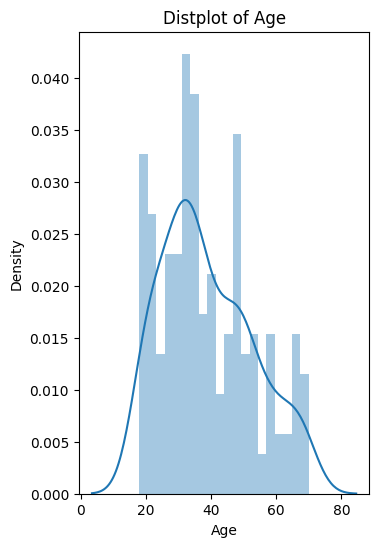

<ipython-input-10-8216d282a594>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x] , bins = 20)


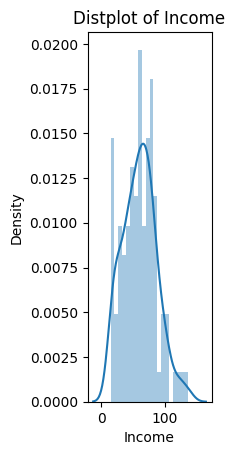

<ipython-input-10-8216d282a594>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x] , bins = 20)


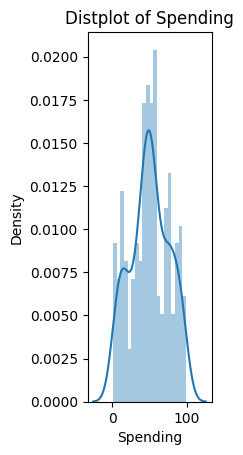

In [10]:
plt.figure(1 , figsize = (15 , 6))
n = 0
for x in ['Age' , 'Income' , 'Spending']:

  n += 1
  plt.subplot(1 , 3 , n)
  plt.subplots_adjust(hspace =0.5 , wspace = 0.5)

  sns.distplot(df[x] , bins = 20)
  plt.title('Distplot of {}'.format(x))
  plt.show()


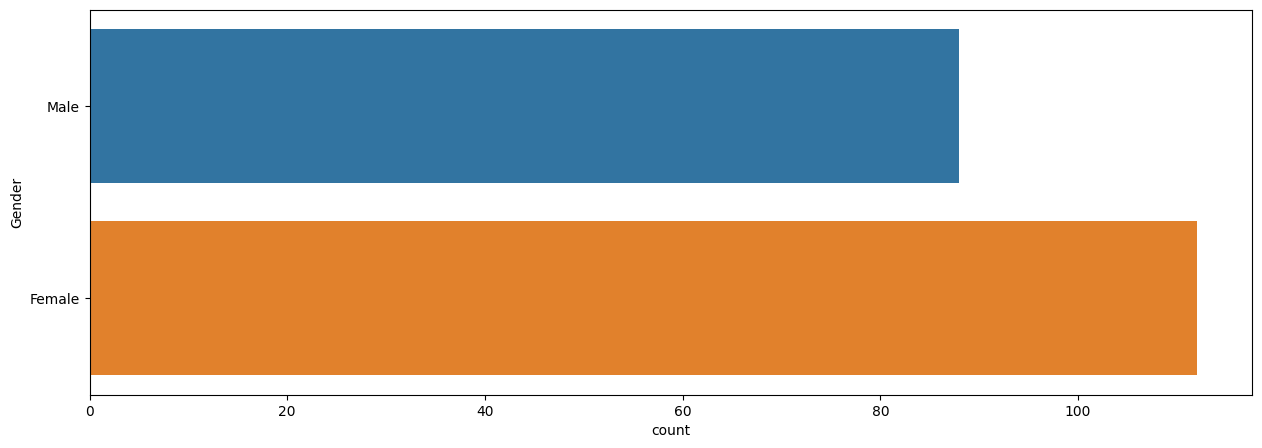

In [11]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = df)
plt.show()


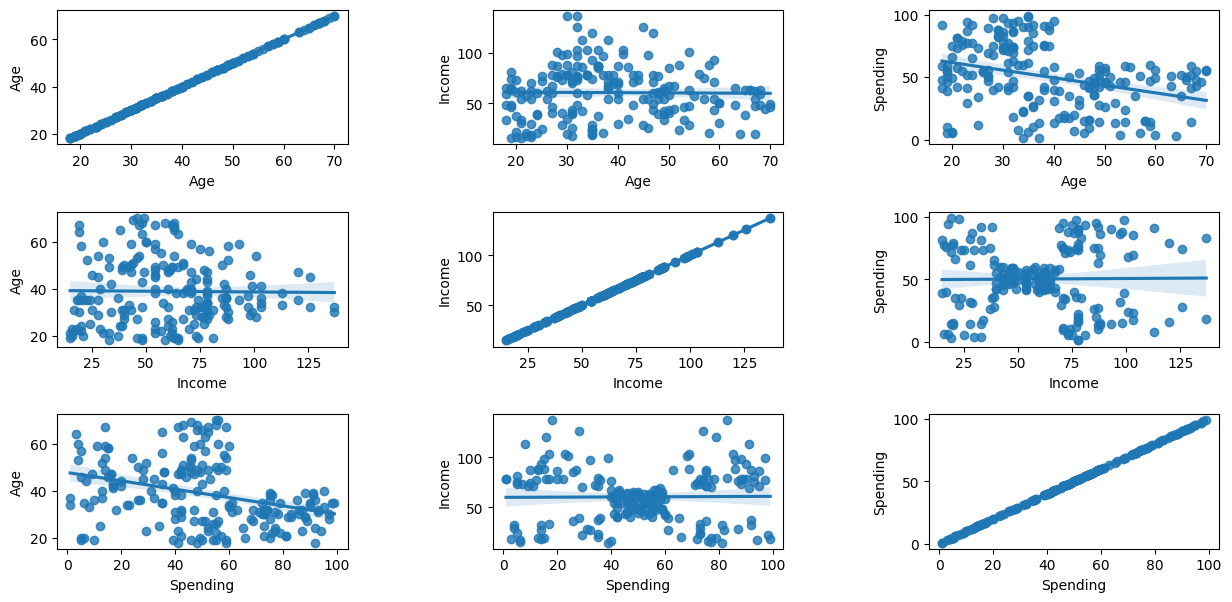

In [12]:
plt.figure(1 , figsize = (15 , 7))
n = 0
for x in ['Age' , 'Income' , 'Spending']:

  for y in ['Age' , 'Income' , 'Spending']:
    n += 1

    plt.subplot(3 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.regplot(x = x , y = y , data = df)
    plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1
else y )
plt.show()


In [13]:
X = df[['Age', 'Income', 'Spending']].to_numpy()
inertia = []
for n in range(2, 11):
   algorithm = KMeans(n_clusters=n)
   algorithm.fit(X)
   inertia.append(algorithm.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

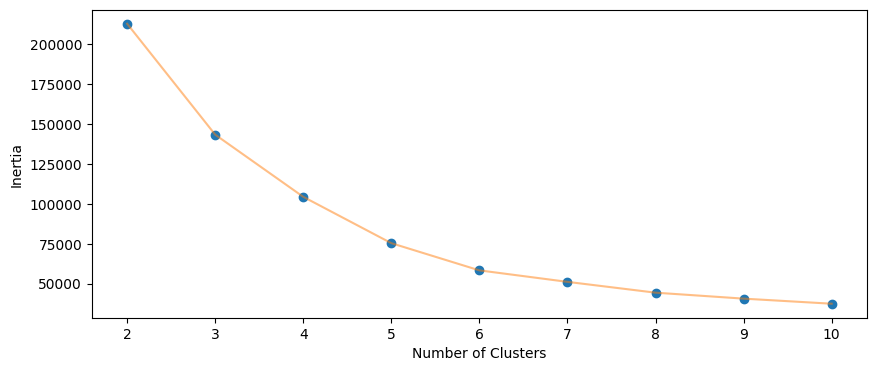

In [14]:
plt.figure(figsize=(10, 4))
plt.plot(np.arange(2 , 11) , inertia , 'o')
plt.plot(np.arange(2 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()


In [15]:
X = df[['Age', 'Income','Spending']].copy()
km = KMeans(n_clusters=5)
df['cluster'] = km.fit_predict(X)
df['cluster'] = df['cluster'].astype('category')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
px.scatter_3d(df,
   x='Age',
   y='Income',
   z='Spending',
   color='cluster')

In [16]:
centroids = km.cluster_centers_
print(centroids)

[[40.66666667 87.75       17.58333333]
 [24.96       28.04       77.        ]
 [32.69230769 86.53846154 82.12820513]
 [43.72727273 55.48051948 49.32467532]
 [45.2173913  26.30434783 20.91304348]]


In [18]:
# Tính khoảng cách từ mỗi điểm dữ liệu đến các cụm centroids
distances = pairwise_distances(X, centroids)
print(distances)

[[ 78.87129107  40.61481503  84.64793469  48.54595137  33.79760173]
 [ 98.49372512  14.20292928  72.49644395  56.20077914  65.76254759]
 [ 75.56022249  72.18423096 104.55750976  63.23545194  31.05632422]
 [ 94.81832043  12.19849171  71.38566994  52.48099512  61.2008068 ]
 [ 74.84326215  39.08149434  81.32187409  41.58946285  25.55419757]
 [ 93.62966351  11.47358706  70.62207852  51.61780416  60.49951179]
 [ 70.93199012  72.40582297 102.46145504  57.94809852  19.89362068]
 [104.96037612  19.84044354  70.23105475  61.8893675   76.83929908]
 [ 74.05187746  84.15368798 108.64109826  62.35212359  26.96325302]
 [ 88.32617896  11.49448563  68.34671058  45.09364331  53.80334211]
 [ 73.70785048  76.27636069 101.88186233  55.85947389  23.992201  ]
 [106.71151401  25.81711061  69.65218369  62.24653783  79.09058959]
 [ 69.97985821  70.71268062  97.84703408  51.38833859  15.43061793]
 [ 91.64158748   8.0971106   67.29949156  49.13202772  60.29651057]
 [ 68.00377849  65.61709533  96.04494688  51.221